In [1]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
path = "../Data/COPD.csv"
df = pd.read_csv(path)
df.head()

,Diseases & Risk Factors,Year,Country Name,Gender,Numeric,Lower Confidence Limit,Upper Confidence Limit
0,Noncommunicable diseases,2000,Nepal,Males,19.28516,12.01887,28.61572
1,Noncommunicable diseases,2000,Nepal,Females,19.23258,11.27446,28.83658
2,Noncommunicable diseases,2001,Nepal,Males,18.83932,11.70583,28.04834
3,Noncommunicable diseases,2001,Nepal,Females,18.76374,11.07713,28.0886
4,Noncommunicable diseases,2002,Nepal,Males,17.34758,10.63618,26.09991


In [3]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3413 entries, 0 to 3412
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diseases & Risk Factors  3413 non-null   object 
 1   Year                     3413 non-null   int64  
 2   Country Name             3413 non-null   object 
 3   Gender                   3283 non-null   object 
 4   Numeric                  3413 non-null   float64
 5   Lower Confidence Limit   3413 non-null   object 
 6   Upper Confidence Limit   3413 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 186.8+ KB


In [4]:
# Summary statistics for numeric columns
print(df.describe())

# Summary statistics for categorical columns
print(df.describe(include='object'))

              Year       Numeric
count  3413.000000   3413.000000
mean   2010.179021   3695.327479
std       6.267335  10799.898258
min    2000.000000      0.064000
25%    2005.000000      7.200000
50%    2010.000000     20.000000
75%    2015.000000     87.800000
max    2022.000000  59210.320000
         Diseases & Risk Factors Country Name   Gender Lower Confidence Limit  \
count                       3413         3413     3283                   3413   
unique                        10            1        2                    908   
top     Noncommunicable diseases        Nepal  Females                no data   
freq                         592         3413     1642                    717   

       Upper Confidence Limit  
count                    3413  
unique                    940  
top                   no data  
freq                      717  


In [5]:
# Check for missing values
missing_data = df.isnull().sum()

# Percentage of missing data
missing_percentage = (df.isnull().sum() / len(df)) * 100

print(missing_data)
print(missing_percentage)

Diseases & Risk Factors      0
Year                         0
Country Name                 0
Gender                     130
Numeric                      0
Lower Confidence Limit       0
Upper Confidence Limit       0
dtype: int64
Diseases & Risk Factors    0.000000
Year                       0.000000
Country Name               0.000000
Gender                     3.808966
Numeric                    0.000000
Lower Confidence Limit     0.000000
Upper Confidence Limit     0.000000
dtype: float64


In [6]:
# Drop rows with missing 'Gender'
df_clean = df.dropna(subset=['Gender'])

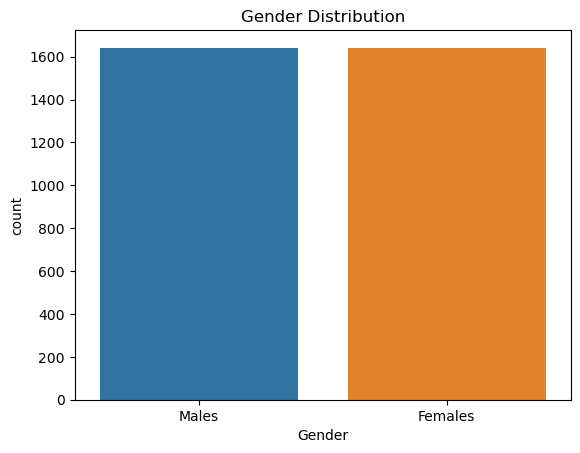

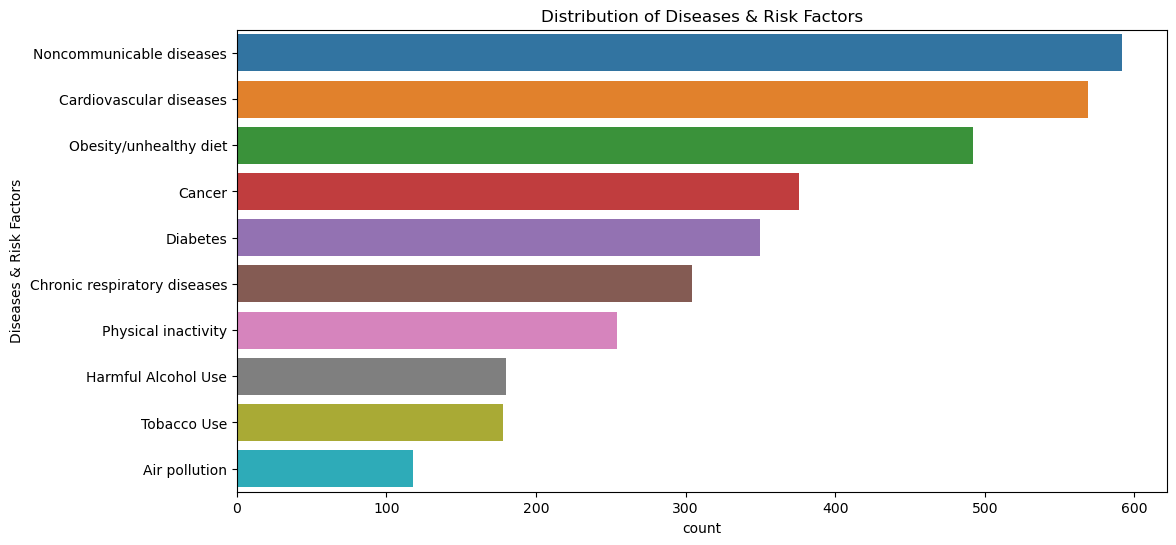

In [7]:
# Count plot for 'Gender'
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.show()

# Count plot for 'Diseases & Risk Factors'
plt.figure(figsize=(12, 6))
sns.countplot(y='Diseases & Risk Factors', data=df, order=df['Diseases & Risk Factors'].value_counts().index)
plt.title('Distribution of Diseases & Risk Factors')
plt.show()

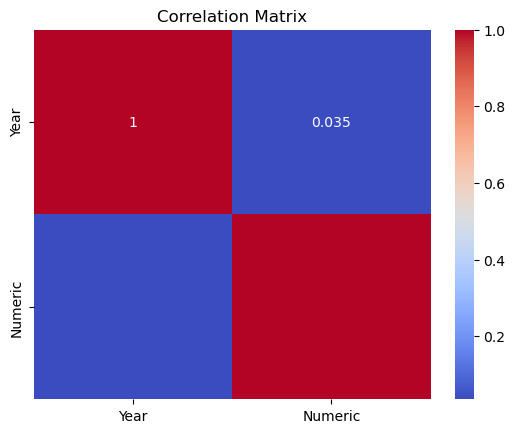

In [8]:
# Correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

# Heatmap of correlations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

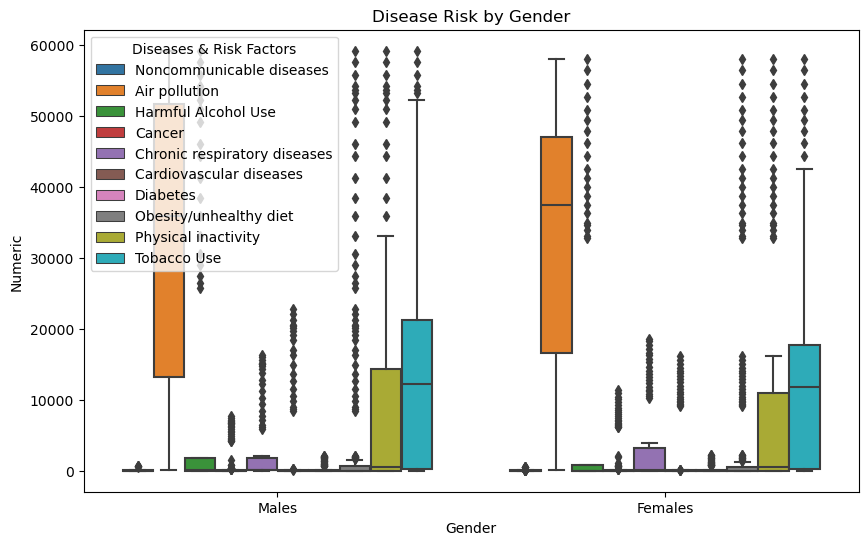

In [9]:
# Plot 'Diseases & Risk Factors' vs 'Numeric' by 'Gender'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Numeric', hue='Diseases & Risk Factors', data=df)
plt.title('Disease Risk by Gender')
plt.show()
